In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [6]:
data=pd.read_csv("HDFC.csv",index_col='Date')

In [7]:
data.shape

(5306, 14)

In [8]:
data=data.tail(2000)

In [9]:
data.isnull().sum()

Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [10]:
data

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2013-03-26,HDFC,EQ,806.20,804.10,827.50,804.10,818.25,824.20,819.06,3355398,2.748261e+14,84682.0,2671503.0,0.7962
2013-03-28,HDFC,EQ,824.20,828.70,830.00,805.20,822.45,826.25,818.38,3393019,2.776778e+14,87170.0,2528647.0,0.7452
2013-04-01,HDFC,EQ,826.25,826.80,835.40,817.95,827.55,825.20,826.25,1514565,1.251410e+14,54461.0,1069738.0,0.7063
2013-04-02,HDFC,EQ,825.20,826.35,827.50,812.60,816.00,817.25,817.66,1303041,1.065444e+14,61256.0,902858.0,0.6929
2013-04-03,HDFC,EQ,817.25,817.00,817.25,803.05,810.00,811.65,809.16,1555063,1.258292e+14,62408.0,1164361.0,0.7488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,HDFC,EQ,2497.35,2500.00,2534.10,2483.20,2502.00,2509.80,2508.07,3916088,9.821805e+14,121028.0,2440395.0,0.6232
2021-04-27,HDFC,EQ,2509.80,2494.15,2526.80,2486.25,2514.00,2518.40,2509.18,2040799,5.120730e+14,102250.0,1040749.0,0.5100
2021-04-28,HDFC,EQ,2518.40,2516.10,2609.00,2508.30,2575.00,2577.00,2574.21,3407461,8.771527e+14,117425.0,1815110.0,0.5327


In [11]:
data=data.iloc[:,2:8]

In [12]:
data

,Prev Close,Open,High,Low,Last,Close
Date,,,,,,
2013-03-26,806.20,804.10,827.50,804.10,818.25,824.20
2013-03-28,824.20,828.70,830.00,805.20,822.45,826.25
2013-04-01,826.25,826.80,835.40,817.95,827.55,825.20
2013-04-02,825.20,826.35,827.50,812.60,816.00,817.25
2013-04-03,817.25,817.00,817.25,803.05,810.00,811.65
...,...,...,...,...,...,...
2021-04-26,2497.35,2500.00,2534.10,2483.20,2502.00,2509.80
2021-04-27,2509.80,2494.15,2526.80,2486.25,2514.00,2518.40
2021-04-28,2518.40,2516.10,2609.00,2508.30,2575.00,2577.00


Matplotlib is building the font cache; this may take a moment.


<AxesSubplot:xlabel='Date'>

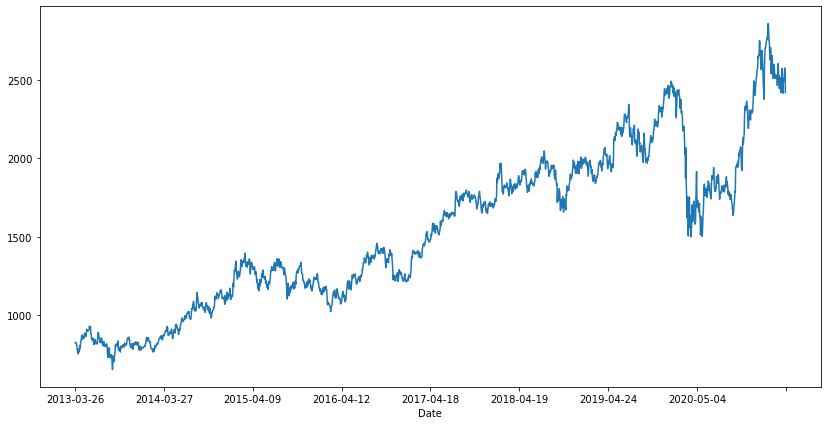

In [13]:
data.Close.plot(figsize=(14, 7))

In [14]:
data.dtypes

Prev Close    float64
Open          float64
High          float64
Low           float64
Last          float64
Close         float64
dtype: object

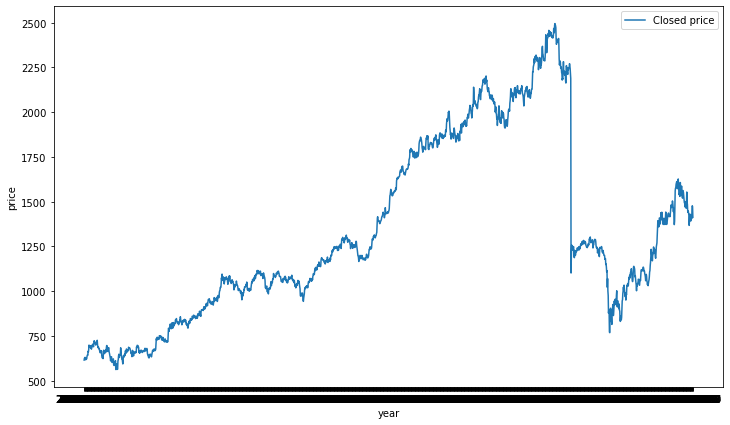

In [75]:
plt.figure(figsize=(12,7))
plt.plot(data.index,data['Close'],label='Closed price')
plt.xlabel("year")
plt.ylabel("price")
plt.xticks(data.index)
plt.legend()

In [15]:
X=data[['Prev Close','Open','High','Low']]


In [16]:
y=data['Close']

In [17]:
X


,Prev Close,Open,High,Low
Date,,,,
2013-03-26,806.20,804.10,827.50,804.10
2013-03-28,824.20,828.70,830.00,805.20
2013-04-01,826.25,826.80,835.40,817.95
2013-04-02,825.20,826.35,827.50,812.60
2013-04-03,817.25,817.00,817.25,803.05
...,...,...,...,...
2021-04-26,2497.35,2500.00,2534.10,2483.20
2021-04-27,2509.80,2494.15,2526.80,2486.25
2021-04-28,2518.40,2516.10,2609.00,2508.30


In [18]:
y

Date
2013-03-26     824.20
2013-03-28     826.25
2013-04-01     825.20
2013-04-02     817.25
2013-04-03     811.65
               ...   
2021-04-26    2509.80
2021-04-27    2518.40
2021-04-28    2577.00
2021-04-29    2538.85
2021-04-30    2420.10
Name: Close, Length: 2000, dtype: float64

In [19]:
sc=StandardScaler()

In [20]:
X=sc.fit_transform(X)

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.1)

In [22]:
lr=LinearRegression()

In [23]:
lr.fit(X,y)

LinearRegression()

In [24]:
y_pred=lr.predict(X_test)

In [25]:
df=pd.DataFrame({"Actual":y_test,'predicted':y_pred})

In [26]:
df

,Actual,predicted
Date,,
2014-11-20,1122.35,1116.439351
2018-01-18,1896.80,1904.365550
2017-10-27,1699.05,1696.859309
2016-03-14,1158.70,1157.181051
2020-05-08,1689.70,1700.193633
...,...,...
2018-10-03,1797.55,1802.256510
2021-04-01,2531.45,2501.078473
2014-10-17,997.15,998.584788


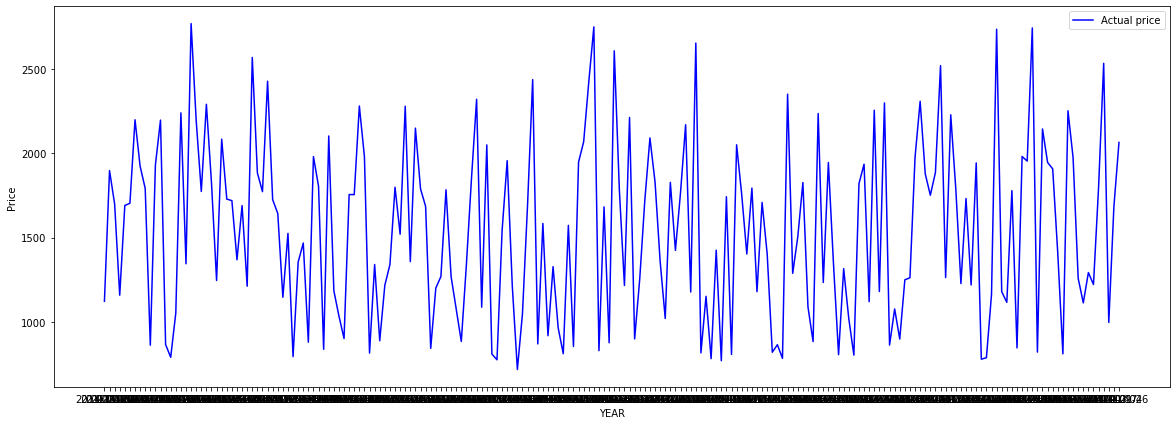

In [30]:
plt.figure(figsize=(20,7))
plt.plot(df['Actual'],'blue',label='Actual price')
plt.xlabel('YEAR')
plt.ylabel("Price")
plt.xticks(df.index)
plt.legend()

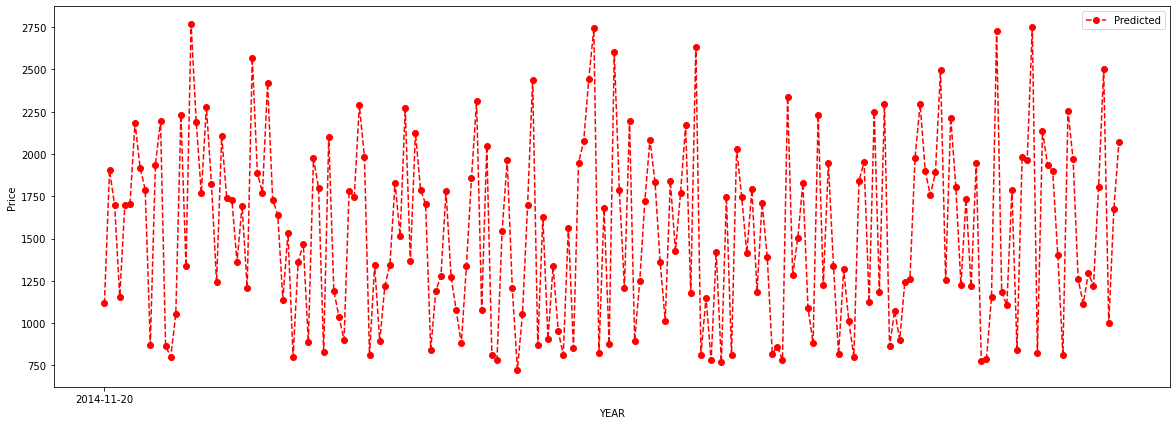

In [31]:
plt.figure(figsize=(20,7))
plt.plot(df['predicted'],'red',marker='o', linestyle='dashed',label='Predicted')
plt.xlabel('YEAR')
plt.ylabel("Price")
plt.xticks(df.index[0:3322:300])
plt.legend()

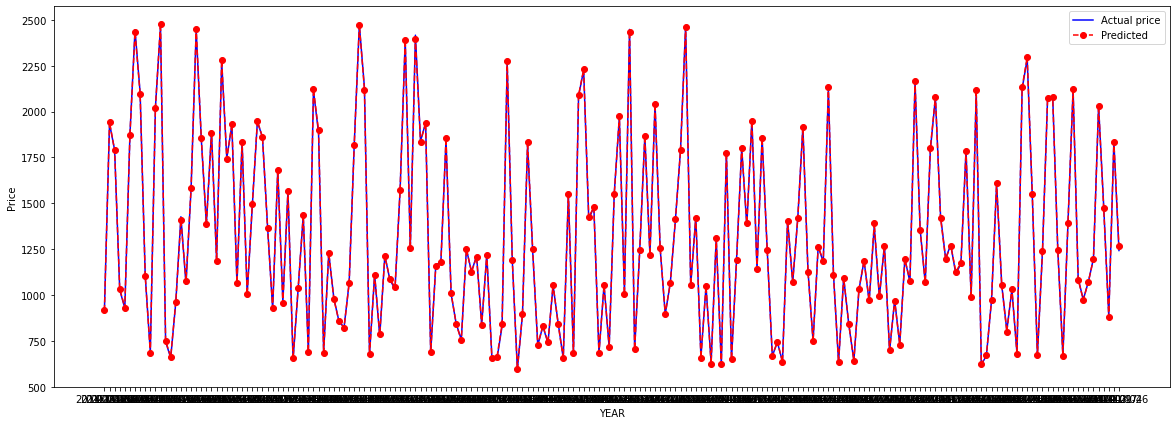

In [88]:
plt.figure(figsize=(20,7))
plt.plot(df['Actual'],'blue',label='Actual price')
plt.plot(df['predicted'],'red',marker='o', linestyle='dashed',label='Predicted')
plt.xlabel('YEAR')
plt.ylabel("Price")
plt.xticks(df.index)
plt.legend()

In [32]:
lr.score(X,y)*100

99.95917223824134